<a href="https://colab.research.google.com/github/fan-of-dark/UNET_Segmentation/blob/main/Preprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount = True)

Mounted at /content/drive/


In [ ]:
data_path = "/content/drive/MyDrive/ECE_MINI_PROJECT/Brain_Tumor/data/"
img_path = "/content/drive/MyDrive/ECE_MINI_PROJECT/Brain_Tumor/data/imgs/"
mask_path = "/content/drive/MyDrive/ECE_MINI_PROJECT/Brain_Tumor/data/masks/"

In [ ]:
import os
import shutil
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
plt.style.use("dark_background")

import cv2 as cv
import imutils

In [ ]:
imgs = next(os.walk(img_path))[2]
masks = next(os.walk(mask_path))[2]

In [ ]:
index = 1013

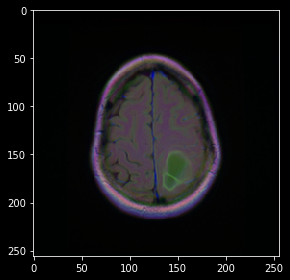

In [ ]:
imshow(img_path+imgs[index])

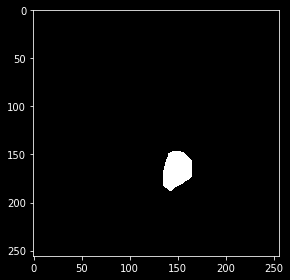

In [ ]:
imshow(mask_path+masks[index])

In [ ]:
img1 = imread(img_path+imgs[index])

##STEP 1

Gray Level Enhancement

In [ ]:
def to_gray(img1):
  red = img1[:,:,0]
  green = img1[:,:,1]
  blue = img1[:,:,2]

  #gray level enhancement
  gray = 0.3*red + 0.59*green + 0.11*blue
  gray = gray.astype(np.uint8)
  return gray

In [ ]:
gray = to_gray(img1)

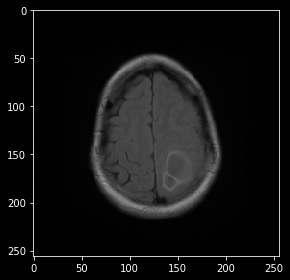

In [ ]:
imshow(gray)

In [ ]:
# imshow(green)
# plt.figure()
# imshow(red)
# plt.figure()
# imshow(blue)

# plt.show()

##STEP 2

Skull stripping -> threshold + morphological operations

[Removing Contours](https://www.pyimagesearch.com/2015/02/09/removing-contours-image-using-python-opencv/)

[Working with Contours](https://www.pyimagesearch.com/2016/02/01/opencv-center-of-contour/)

In [ ]:
def crop_brain(image):
  gray_blur = cv.GaussianBlur(image, (5,5), 0)
  th1 = cv.threshold(gray_blur, thresh = 45, maxval = 225, type = cv.THRESH_BINARY)[1]
  th1_e = cv.erode(th1, None, iterations = 2)
  th1_d = cv.dilate(th1_e, None, iterations = 2)

  contour = cv.findContours(th1_d.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  contour = imutils.grab_contours(contour)
  c = max(contour, key = cv.contourArea)

  #extreme points based on contour
  left = tuple(c[c[:,:,0].argmin()][0])
  right = tuple(c[c[:,:,0].argmax()][0])
  top = tuple(c[c[:,:,1].argmin()][0])
  bottom = tuple(c[c[:,:,1].argmax()][0])

  new_image = image[top[1]:bottom[1], left[0]:right[0]]

  return new_image

In [ ]:
def crop_only_brain(image):
  gray_blur = cv.GaussianBlur(image, (5,5), 0)
  th1 = cv.threshold(gray_blur, thresh = 55, maxval = 256, type = cv.THRESH_BINARY)[1]
  th1_e = cv.erode(th1, None , iterations = 2)
  th1_d = cv.dilate(th1_e, None , iterations = 2)

  contour = cv.findContours(th1_d.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
  contour = imutils.grab_contours(contour)
  mask = np.ones(image.shape, dtype = np.uint8)*255


  max_contour = max(contour, key = cv.contourArea)
  for cnt in contour:
    if cnt.shape != max_contour.shape:
      cv.drawContours(mask, [cnt], -1,0,-1)

  new_image = cv.bitwise_and(image, image, mask = mask)

  return new_image

In [ ]:
brain = crop_only_brain(gray)

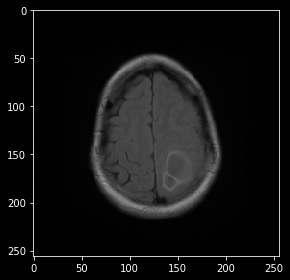

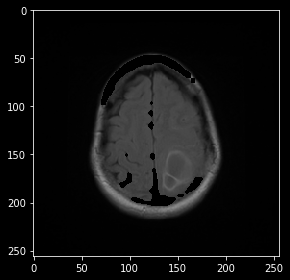

In [ ]:
imshow(gray)
plt.figure()
imshow(brain)

##STEP 3

Histogram Equilization

Histogram Equalization is a image processing technique used to improve contrast in images.




In [ ]:
def hist(image):
  equalized = cv.equalizeHist(gray)
  return equalized

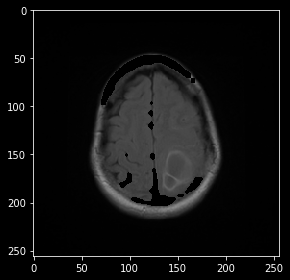

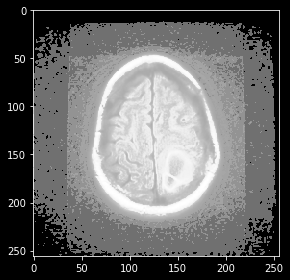

In [ ]:
imshow(brain)
plt.figure()
imshow(hist(brain))

In [ ]:
def to_gray(img1):
  red = img1[:,:,0]
  green = img1[:,:,1]
  blue = img1[:,:,2]

  #gray level enhancement
  gray = 0.3*red + 0.59*green + 0.11*blue
  gray = gray.astype(np.uint8)
  return gray



def preprocess(img):
  gray = to_gray(img)
  return gray

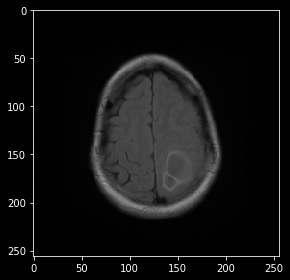

In [ ]:
imshow(preprocess(img1))